In [39]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random
import math

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
%cd /content/drive/
%cd My\ Drive/
%cd Colab\ Notebooks/
%cd Comp562/Fianl_Project/

/content/drive
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/Comp562/Fianl_Project


In [42]:
data = pd.read_csv("EACSF_Infant&Mullen.csv")
data

,Unnamed: 0,Case,VOLUME,Quality_Rating,Hippocampus_L,Hippocampus_R,Amygdala_L,Amygdala_R,Caudate_L,Caudate_R,Thalamus_L,Thalamus_R,Hippocampus,Amygdala,Caudate,Thalamus,ICV,GM,WM,Left_Vent,Right_Vent,Total_Vent,FinalDiagnosis,SCHIZ,BD,MOODD,Psychosis,MVM,normalized_eacsf_volumes,normalized_Amygdala_L,normalized_Amygdala_R,normalized_Amygdala,normalized_Hippocampus_L,normalized_Hippocampus_R,normalized_Hippocampus,normalized_Caudate_L,normalized_Caudate_R,normalized_Caudate,normalized_Thalamus_L,normalized_Thalamus_R,...,MS1N_enroll,MEDUY,FEDUY_enroll,TINN_enroll,Child_Language,M_Language_1,M1_Validity,AgeAtMUL_1,GM_rs_1,GM_ts_1,VR_rs_1,VR_ts_1,FM_rs_1,FM_ts_1,RL_rs_1,RL_ts_1,EL_rs_1,EL_ts_1,MCOMP_1,M_Language_2,M2_Validity,AgeAtMUL_2,GM_rs_2,GM_ts_2,VR_rs_2,VR_ts_2,FM_rs_2,FM_ts_2,RL_rs_2,RL_ts_2,EL_rs_2,EL_ts_2,MCOMP_2,Volume_yr1,Volume_yr2,normalized_eacsf_volumes_1,normalized_eacsf_volumes_2,MRI_ABS_TIME,sMRI_Scanner,AgeAtMRI
0,0,C0025-1-1,33986.0,2.0,1409.0,1143.0,322.0,329.0,2205.70,2296.83,4487.17,4377.09,2552.0,651.0,4502.53,8864.26,515013.000000,276557.0000,172025.000000,4176.00,1922.00,6098.00,MVM,0.0,0.0,0.0,0.0,1.0,0.065991,0.000625,0.000639,0.001264,0.002736,0.002219,0.004955,0.004283,0.004460,0.008743,0.008713,0.008499,...,1.0,14.0,14.0,108000.0,English,English,Y,372.0,18.0,63.0,18.0,66.0,18.0,71.0,14.0,55.0,11.0,46.0,119.0,English,Y,743.0,24.0,44.0,27.0,53.0,25.0,52.0,26.0,56.0,22.0,48.0,105.0,NaN,NaN,NaN,NaN,251,A,19
1,1,C0108-1-1,45639.0,1.0,1196.0,1280.0,284.0,274.0,1947.14,2078.72,4933.12,5046.78,2476.0,558.0,4025.86,9979.90,561863.000000,287923.0000,189370.000000,2826.00,2101.00,4927.00,Schizophrenia,1.0,0.0,0.0,1.0,0.0,0.081228,0.000505,0.000488,0.000993,0.002129,0.002278,0.004407,0.003466,0.003700,0.007165,0.008780,0.008982,...,5.0,12.0,12.0,6000.0,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,Y,808.0,26.0,47.0,22.0,33.0,23.0,39.0,22.0,40.0,25.0,52.0,82.0,NaN,NaN,NaN,NaN,644,A,58
2,2,C0399-1-1,52387.0,2.0,1273.0,1287.0,332.0,298.0,2257.92,2150.91,5613.06,5572.10,2560.0,630.0,4408.83,11185.16,604950.000000,307872.0000,214351.000000,1430.00,1914.00,3344.00,noDiagnosis,0.0,0.0,0.0,0.0,0.0,0.086597,0.000549,0.000493,0.001041,0.002104,0.002127,0.004232,0.003732,0.003556,0.007288,0.009279,0.009211,...,1.0,18.0,19.0,152000.0,English,English,Y,385.0,14.0,37.0,20.0,69.0,19.0,69.0,14.0,50.0,14.0,57.0,122.0,English,Y,728.0,23.0,39.0,27.0,53.0,26.0,56.0,26.0,56.0,25.0,57.0,111.0,88255.0,79838.0,0.145888,0.131975,2401,A,40
3,3,C0170-1-1,44927.0,1.5,1621.0,1493.0,371.0,371.0,2823.68,2844.67,5934.59,5778.94,3114.0,742.0,5668.35,11713.53,680258.000000,344633.0000,238821.000000,6310.00,4249.00,10559.00,noDiagnosis,0.0,0.0,0.0,0.0,0.0,0.066044,0.000545,0.000545,0.001091,0.002383,0.002195,0.004578,0.004151,0.004182,0.008333,0.008724,0.008495,...,5.0,12.0,12.0,10000.0,English,English,Y,336.0,17.0,58.0,16.0,57.0,17.0,66.0,12.0,45.0,14.0,62.0,115.0,English,Y,742.0,28.0,58.0,29.0,59.0,30.0,72.0,32.0,74.0,27.0,63.0,133.0,NaN,NaN,NaN,NaN,1003,A,17
4,4,C0546-1-1,47455.0,1.5,1099.0,1024.0,291.0,299.0,2333.18,2397.18,4898.82,4829.18,2123.0,590.0,4730.36,9728.00,531190.000000,250290.0000,192058.000000,6024.00,3497.00,9521.00,noDiagnosis,0.0,0.0,0.0,0.0,0.0,0.089337,0.000548,0.000563,0.001111,0.002069,0.001928,0.003997,0.004392,0.004513,0.008905,0.009222,0.009091,...,1.0,16.0,16.0,131000.0,English,English,Y,382.0,17.0,58.0,16.0,57.0,16.0,60.0,15.0,60.0,14.0,62.0,120.0,English,Y,759.0,24.0,44.0,31.0,65.0,25.0,52.0,28.0,63.0,28.0,66.0,123.0,102818.0,NaN,0.193562,NaN,3423,T,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,646,T0117-1-2,30566.0,2.0,1258.0,1288.0,272.0,243.0,1892.35,2101.76,5154.30,5128.19,2546.0,515.0,3994.11,10282.4

In [43]:
#create dataframe with mullen scores and later year EACSF Volumes for comparing mean values in our clusters
mullen = data.drop(data.columns.difference(['Case','GM_ts_1'
 'VR_ts_1',
 'FM_ts_1',
 'RL_ts_1',
 'EL_ts_1',
 'MCOMP_1',
 'GM_ts_2',
 'VR_ts_2',
 'FM_ts_2',
 'RL_ts_2',
 'EL_ts_2',
 'MCOMP_2',
 'normalized_eacsf_volumes', 'normalized_Amygdala_L','normalized_Amygdala_R',"WGESTAGE",
 'normalized_Amygdala',
 'normalized_Hippocampus_L',
 'normalized_Hippocampus_R',
 'normalized_Hippocampus',
 'normalized_Caudate_L',
 'normalized_Caudate_R',
 'normalized_Caudate',
 'normalized_Thalamus_L',
 'normalized_Thalamus_R',
 'normalized_Thalamus',
 'normalized_Left_Vent',
 'normalized_Right_Vent',
 'normalized_Total_Vent',
 'normalized_GM',
 'normalized_WM',
 'Volume_yr1',
 'Volume_yr2',]), 1)

In [44]:
mullen

,Case,normalized_eacsf_volumes,normalized_Amygdala_L,normalized_Amygdala_R,normalized_Amygdala,normalized_Hippocampus_L,normalized_Hippocampus_R,normalized_Hippocampus,normalized_Caudate_L,normalized_Caudate_R,normalized_Caudate,normalized_Thalamus_L,normalized_Thalamus_R,normalized_Thalamus,normalized_Left_Vent,normalized_Right_Vent,normalized_Total_Vent,normalized_GM,normalized_WM,WGESTAGE,FM_ts_1,RL_ts_1,EL_ts_1,MCOMP_1,GM_ts_2,VR_ts_2,FM_ts_2,RL_ts_2,EL_ts_2,MCOMP_2,Volume_yr1,Volume_yr2
0,C0025-1-1,0.065991,0.000625,0.000639,0.001264,0.002736,0.002219,0.004955,0.004283,0.004460,0.008743,0.008713,0.008499,0.017212,0.008109,0.003732,0.011840,0.536990,0.334021,38,71.0,55.0,46.0,119.0,44.0,53.0,52.0,56.0,48.0,105.0,NaN,NaN
1,C0108-1-1,0.081228,0.000505,0.000488,0.000993,0.002129,0.002278,0.004407,0.003466,0.003700,0.007165,0.008780,0.008982,0.017762,0.005030,0.003739,0.008769,0.512443,0.337039,39,NaN,NaN,NaN,NaN,47.0,33.0,39.0,40.0,52.0,82.0,NaN,NaN
2,C0399-1-1,0.086597,0.000549,0.000493,0.001041,0.002104,0.002127,0.004232,0.003732,0.003556,0.007288,0.009279,0.009211,0.018489,0.002364,0.003164,0.005528,0.508921,0.354328,38,69.0,50.0,57.0,122.0,39.0,53.0,56.0,56.0,57.0,111.0,88255.0,79838.0
3,C0170-1-1,0.066044,0.000545,0.000545,0.001091,0.002383,0.002195,0.004578,0.004151,0.004182,0.008333,0.008724,0.008495,0.017219,0.009276,0.006246,0.015522,0.506621,0.351074,41,66.0,45.0,62.0,115.0,58.0,59.0,72.0,74.0,63.0,133.0,NaN,NaN
4,C0546-1-1,0.089337,0.000548,0.000563,0.001111,0.002069,0.001928,0.003997,0.004392,0.004513,0.008905,0.009222,0.009091,0.018314,0.011341,0.006583,0.017924,0.471187,0.361562,37,60.0,60.0,62.0,120.0,44.0,65.0,52.0,63.0,66.0,123.0,102818.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,T0117-1-2,0.059962,0.000534,0.000477,0.001010,0.002468,0.002527,0.004995,0.003712,0.004123,0.007835,0.010111,0.010060,0.020171,0.004173,0.003276,0.007449,0.514222,0.372007,37,60.0,50.0,62.0,115.0,51.0,43.0,48.0,42.0,48.0,91.0,NaN,92164.0
647,T0210-1-1,0.083646,0.000531,0.000563,0.001095,0.002380,0.002228,0.004608,0.004810,0.004863,0.009674,0.009217,0.009975,0.019192,0.003267,0.002963,0.006229,0.504055,0.363422,32,60.0,55.0,62.0,121.0,61.0,59.0,52.0,52.0,63.0,113.0,NaN,58745.0
648,T0027-1-2,0.122935,0.000523,0.000559,0.001082,0.002417,0.001951,0.004367,0.003180,0.003469,0.006650,0.008504,0.008720,0.017224,0.011944,0.007473,0.019418,0.479089,0.334667,30,66.0,40.0,46.0,102.0,48.0,62.0,52.0,47.0,41.0,101.0,NaN,NaN
649,T0257-1-2,0.061496,0.000559,0.000486,0.001045,0.002443,0.002519,0.004962,0.004187,0.004272,0.008460,0.010107,0.009800,0.019907,0.003549,0.004945,0.008494,0.499382,0.367548,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
list(data.columns)

['Unnamed: 0',
 'Case',
 'VOLUME',
 'Quality_Rating',
 'Hippocampus_L',
 'Hippocampus_R',
 'Amygdala_L',
 'Amygdala_R',
 'Caudate_L',
 'Caudate_R',
 'Thalamus_L',
 'Thalamus_R',
 'Hippocampus',
 'Amygdala',
 'Caudate',
 'Thalamus',
 'ICV',
 'GM',
 'WM',
 'Left_Vent',
 'Right_Vent',
 'Total_Vent',
 'FinalDiagnosis',
 'SCHIZ',
 'BD',
 'MOODD',
 'Psychosis',
 'MVM',
 'normalized_eacsf_volumes',
 'normalized_Amygdala_L',
 'normalized_Amygdala_R',
 'normalized_Amygdala',
 'normalized_Hippocampus_L',
 'normalized_Hippocampus_R',
 'normalized_Hippocampus',
 'normalized_Caudate_L',
 'normalized_Caudate_R',
 'normalized_Caudate',
 'normalized_Thalamus_L',
 'normalized_Thalamus_R',
 'normalized_Thalamus',
 'normalized_Left_Vent',
 'normalized_Right_Vent',
 'normalized_Total_Vent',
 'normalized_GM',
 'normalized_WM',
 'GESTNO',
 'EXCL_at_SomeAge_YN',
 'EXCL_1stAssmnt_at_AGE',
 'EXCL_REASON',
 'HR_YN',
 'fgroup',
 'FinalDiagnosis_compiled',
 'ZYGOSITY',
 'Zygosity_COMMENTS',
 'METHOD',
 'GENDER',


In [46]:
#Here we drop nomalized columns that are dependant on other columns, as well as any non-numeric colummns
#Also we drop columns like WGESTAGE (weeks of gestation), because we also have a columns for Days of gestation

data["SEX"] = data["GENDER"]
Case = data['Case']
data = data.drop(['Case','GENDER','Unnamed: 0', 'normalized_eacsf_volumes', 'normalized_Amygdala_L','normalized_Amygdala_R',"WGESTAGE",
 'normalized_Amygdala',
 'normalized_Hippocampus_L',
 'normalized_Hippocampus_R',
 'normalized_Hippocampus',
 'normalized_Caudate_L',
 'normalized_Caudate_R',
 'normalized_Caudate',
 'normalized_Thalamus_L',
 'normalized_Thalamus_R',
 'normalized_Thalamus',
 'normalized_Left_Vent',
 'normalized_Right_Vent',
 'normalized_Total_Vent',
 'normalized_GM',
 'normalized_WM',
 'FinalDiagnosis'], axis=1)

In [47]:
#CONVERTS ALL CATEGORICAL COLUMNS TO NUMERICAL

print("Categorical variables converted to numerical variables:")
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        print(col_name)
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

Categorical variables converted to numerical variables:
EXCL_REASON
FinalDiagnosis_compiled
ZYGOSITY
MRACE
PETHNIC_enroll
Child_Language
M_Language_1
M1_Validity
M_Language_2
M2_Validity
sMRI_Scanner


In [48]:
#Shows what percentage of a columns value are null values
data.isnull().mean()

VOLUME                        0.000000
Quality_Rating                0.000000
Hippocampus_L                 0.027650
Hippocampus_R                 0.027650
Amygdala_L                    0.027650
                                ...   
normalized_eacsf_volumes_1    0.648233
normalized_eacsf_volumes_2    0.695853
MRI_ABS_TIME                  0.000000
sMRI_Scanner                  0.000000
AgeAtMRI                      0.000000
Length: 91, dtype: float64

In [49]:
# THIS IDENTIFIES COLUMNS THAT HAVE MORE THAN 10% OF CASES MISSING A VALUE:
list(data[data.columns[data.isnull().mean() < 0.1]].columns)

['VOLUME',
 'Quality_Rating',
 'Hippocampus_L',
 'Hippocampus_R',
 'Amygdala_L',
 'Amygdala_R',
 'Caudate_L',
 'Caudate_R',
 'Thalamus_L',
 'Thalamus_R',
 'Hippocampus',
 'Amygdala',
 'Caudate',
 'Thalamus',
 'ICV',
 'GM',
 'WM',
 'Left_Vent',
 'Right_Vent',
 'Total_Vent',
 'SCHIZ',
 'BD',
 'MOODD',
 'Psychosis',
 'MVM',
 'GESTNO',
 'EXCL_REASON',
 'FinalDiagnosis_compiled',
 'ZYGOSITY',
 'METHOD',
 'SEX',
 'DGESTAGE',
 'GestAgeBirth',
 'BW',
 'PREMATURE_37',
 'PREMATURE_33',
 'PREMATURE_32',
 'apgar5',
 'MAgeAtBirth',
 'PAgeAtBirth',
 'MAGE_enroll',
 'MRACE',
 'MHISPAN',
 'PAGE_enroll',
 'PETHNIC_enroll',
 'PHISPAN_enroll',
 'MS1N_enroll',
 'MEDUY',
 'FEDUY_enroll',
 'TINN_enroll',
 'Child_Language',
 'M_Language_1',
 'M1_Validity',
 'M_Language_2',
 'M2_Validity',
 'MRI_ABS_TIME',
 'sMRI_Scanner',
 'AgeAtMRI']

In [50]:
# This removes varibles with more than 10% of cases with missing values:
data = data[data.columns[data.isnull().mean() < 0.01]]

In [51]:
data.shape

(651, 45)

In [52]:
#Shows what percentage of a columns value are null values
data.isnull().mean()

VOLUME                     0.000000
Quality_Rating             0.000000
Caudate_L                  0.003072
Caudate_R                  0.003072
Thalamus_L                 0.003072
Thalamus_R                 0.003072
Caudate                    0.003072
Thalamus                   0.003072
ICV                        0.000000
GM                         0.000000
WM                         0.000000
SCHIZ                      0.000000
BD                         0.000000
MOODD                      0.000000
Psychosis                  0.000000
MVM                        0.000000
GESTNO                     0.000000
EXCL_REASON                0.000000
FinalDiagnosis_compiled    0.000000
ZYGOSITY                   0.000000
METHOD                     0.001536
SEX                        0.000000
DGESTAGE                   0.000000
GestAgeBirth               0.000000
BW                         0.001536
PREMATURE_37               0.000000
PREMATURE_33               0.000000
PREMATURE_32               0

In [53]:
#Drops rows with null values
data = data.dropna()

In [54]:
data.shape

(646, 45)

In [55]:
#Scale data for PCA
data_scale = preprocessing.scale(data)
data_scale

array([[-0.05547268,  0.8375758 ,  0.93337026, ..., -2.08282044,
        -0.46783322, -0.71103165],
       [ 1.03226541, -2.08714835, -0.02036502, ..., -1.6530283 ,
        -0.46783322,  1.14936209],
       [ 1.66215098,  0.8375758 ,  1.12599115, ...,  0.26845968,
        -0.46783322,  0.29071883],
       ...,
       [ 3.66653687,  0.8375758 , -0.15448404, ..., -1.27026177,
        -0.46783322,  2.43732699],
       [-0.49755004,  0.8375758 ,  0.1439271 , ...,  0.81964348,
        -0.46783322, -0.28171002],
       [ 0.25610039,  0.8375758 ,  0.44986307, ...,  0.06942108,
        -0.46783322,  1.96030296]])

In [56]:
#Splits the data into testing and training sets
batch_num = math.floor((len(data_scale) - 100)/3)
test_num = len(data_scale) - batch_num*3
training = np.copy(data_scale).tolist()
testing = []
for i in range(test_num):
    val1 = random.choice(training)
    training.remove(val1)
    testing.append(val1)

print(len(testing))

100


In [57]:
# This function extracts the top feature of all PCA components that explains more than 10% of the variance of the dataset
# We believe that this helps us loosely interpret and verify the PCA results in accordance with previously established trends in neuroscience literature
def get_imp_features(pca):
    n_pcs= pca.components_.shape[0]
    for i in range(n_pcs):
        if pca.explained_variance_ratio_[i] > 0.1:
            most_important = np.abs(pca.components_[i].argmax())
            most_important_name = initial_features[most_important]
            if most_important_name not in imp_variables:
                imp_variables[most_important_name] = 1
            else:
                imp_variables[most_important_name] += 1

In [58]:
models = [0]*63
loss = [0]*63
imp_variables = {}
initial_features = data.columns.tolist()

indx = 0
#In total 9 PCA models are trained for each possible number of components
#The for loop does this in 3 trials by randomly splitting the training data into 3 subsets and fitting a PCA model to each of those subsets
#For each model the "loss" (see report) is the inverted reconstrution accurancy of each PCA model on the testing data
#We call the get_imp_feature function on each PCA model
for i in [5,10,15,20,25,30,35]:
  if i == 5:
    indx = 0
  elif i == 10:
    indx = 9
  elif i == 15:
    indx = 18
  elif i == 20:
    indx = 27
  elif i == 25:
    indx = 36
  elif i == 30:
    indx = 45
  else:
    indx = 54
  for j in range(3):
    fresh_test = training.copy()
    batch1 = []
    batch2 = []
    batch3 = []
    for k in range(batch_num):
      for l in range(3):
        val1 = random.choice(fresh_test)
        fresh_test.remove(val1)
        if l == 0:
            batch1.append(val1)
        elif l == 1:
            batch2.append(val1)
        else:
            batch3.append(val1)
    models[indx + j*3] = PCA(n_components = i)
    models[indx + j*3].fit(np.array(batch1))
    x1_proj = models[indx + j*3].inverse_transform(models[indx + j*3].transform(np.array(testing)))
    loss[indx + j*3] = ((np.array(testing) - x1_proj) ** 2).mean()
    get_imp_features(models[indx+j*3])
    models[indx + j*3+1] = PCA(n_components = i)
    models[indx + j*3+1].fit(np.array(batch2))
    x2_proj = models[indx+ j*3+1].inverse_transform(models[indx+ j*3+1].transform(np.array(testing)))
    loss[indx+ j*3+1] = ((np.array(testing) - x2_proj) ** 2).mean()
    get_imp_features(models[indx+j*3+1])
    models[indx+ j*3+2] = PCA(n_components = i)
    models[indx+ j*3+2].fit(np.array(batch3))
    x3_proj = models[indx+ j*3+2].inverse_transform(models[indx+ j*3+2].transform(np.array(testing)))
    loss[indx+ j*3+2] = ((np.array(testing) - x3_proj) ** 2).mean()
    get_imp_features(models[indx+j*3+2])

In [59]:
print(loss)
print(imp_variables)
print(loss[27:36])

#We choose to got with 20 PCA components (see report for justification)
# 5 components - 50% loss, 10 components - 35 % loss, 15 components - 24% loss, 20 components - 15% loss, 25 - 8% loss, 30 - 4% loss, 35 - 1% loss

[0.5060728028271252, 0.5242040908686149, 0.52800519888291, 0.5322712646141363, 0.5195755130376749, 0.540417087728107, 0.515845394492233, 0.5253744274351247, 0.5185801846043568, 0.377974696550707, 0.3233753823702607, 0.3410393950018905, 0.3883917737895428, 0.3447712517736527, 0.34731890864855175, 0.344331179978751, 0.34445369826229905, 0.3687517705095483, 0.2507571332087687, 0.22841740519118492, 0.23102191606962433, 0.25948191707739726, 0.2276942689848197, 0.23445711769743016, 0.23182913531602709, 0.23548520942261844, 0.24944483775152254, 0.14188942050427183, 0.1512519241033196, 0.1573206987598074, 0.16333108000885427, 0.15336475624016813, 0.14854332392181394, 0.13817255663035372, 0.1710704030814389, 0.14468498057624146, 0.06981828056985194, 0.07357503559376806, 0.079227893907857, 0.07846183593476613, 0.07338412473793454, 0.0796198153841611, 0.07858062690419779, 0.07329802750879676, 0.07787954497148253, 0.037641816051321636, 0.03608337531148482, 0.03953146887325557, 0.03388371534109881,

In [60]:
index = np.argmin(loss[27:36])
pca = models[index+27] 
model_output = pca.transform(data_scale)
#For our final model we chose the PCA model with 20 components with the smallest loss

In [61]:
PCA_components = pd.DataFrame(model_output)
n_pca = pca.components_.shape[0]
print(pca.components_)

[[ 1.80610212e-01 -9.01403233e-02  2.63369101e-01  2.65784510e-01
   3.14774308e-01  3.05619603e-01  2.68258667e-01  3.12798629e-01
   3.10246166e-01  3.00417907e-01  2.97926686e-01 -6.01354349e-02
   6.64711322e-02  7.16793917e-02 -2.38829599e-02  5.00137368e-02
  -1.02528907e-01 -1.90675889e-02  4.07656638e-02 -8.09281813e-02
  -2.52692590e-02  7.05061826e-02  2.31391244e-02  1.54823968e-01
   1.83949554e-01 -1.11426950e-01 -1.19358195e-01 -1.20554826e-01
   8.91867156e-02 -1.50625158e-02 -1.44888515e-02  5.84398065e-02
  -3.33571540e-02  6.94216438e-02 -2.90811101e-02  3.10397220e-04
   3.02487402e-02 -5.59747198e-02 -6.13879593e-02 -4.87213546e-02
  -8.54597656e-02 -6.81858838e-02 -4.63844195e-03 -1.58831396e-02
   1.45943775e-02]
 [-1.75313528e-01 -2.80691408e-02 -4.92986478e-02 -5.90621617e-02
  -7.43364835e-02 -7.13619253e-02 -5.48881999e-02 -7.34629421e-02
  -1.23922263e-01 -9.78531273e-02 -9.74364112e-02  2.11788010e-01
   1.88628151e-02  7.06967350e-03  1.96960189e-01  5.2823

In [62]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.905583,1.771393,0.148792,-2.802990,2.944196,-0.891246,-1.436036,3.497294,3.346168,0.111875,-2.354110,0.866218,0.130949,-0.335043,-1.387159,-2.249332,-0.028992,0.261346,-0.544651,-0.015665
1,2.632906,3.302639,4.790562,5.498677,1.608955,2.398649,-0.588809,1.813703,-0.079579,-0.633323,-1.122691,-1.516940,0.404851,-1.441778,2.501932,1.401888,-2.215469,1.224309,1.368203,1.457121
2,5.092918,-0.105847,1.143747,-0.633338,0.453633,0.508987,-1.062811,-0.369931,-0.919986,0.547160,0.750992,-1.805763,-0.072168,-0.196312,-0.496739,-0.935145,-0.443592,-0.841370,0.266512,-0.464071
3,9.082903,-0.066209,2.466236,-0.892585,0.142807,0.376777,-1.393054,0.810669,-0.439756,0.517875,-0.807656,-0.036815,-0.310958,-0.413045,1.196394,-0.651697,0.645018,-1.796310,0.611746,-0.442021
4,2.332925,-0.404750,1.153839,-0.673261,1.564428,-1.062276,-0.123015,-2.534021,2.253249,0.234386,0.883279,-1.233757,2.075448,0.244423,0.208112,-1.091640,-0.938923,-1.630679,-4.956838,0.212531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,0.901680,-1.364714,5.612805,-3.568644,-3.428245,-1.086405,1.631226,0.492478,-1.003222,0.086833,0.354679,0.179784,-0.412552,0.060116,1.019141,-0.330687,0.749342,-1.460712,0.331518,0.046590
642,-0.926589,-3.045089,1.426839,0.000648,0.061427,0.873085,-2.529644,0.168718,-0.531457,-0.206864,1.077876,0.698585,0.622422,-0.813139,1.992779,0.220259,-0.163471,0.758293,-0.657876,-0.782816
643,1.436755,-6.348343,2.071629,-0.021985,3.961180,0.282996,-0.593380,0.883987,-1.237042,1.684745,0.587481,-1.561099,0.318375,-1.461969,1.642794,-0.106018,-1.697672,0.497760,1.448341,2.089187
644,0.557647,-0.648766,-3.714497,0.522725,-1.032277,0.885318,0.817236,1.268025,-0.198748,-1.278469,0.457508,1.026551,-1.031306,0.643027,0.276435,0.168569,-0.350038,-0.184677,0.763186,0.296743


In [63]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.19238702 0.14035059 0.08914636 0.07757457 0.04925872 0.04628966
 0.04326912 0.03719379 0.02901572 0.02696226 0.02616896 0.02268768
 0.02055628 0.01933999 0.01833068 0.01681777 0.01620862 0.01494597
 0.01354527 0.01327025]
0.9133192642411284


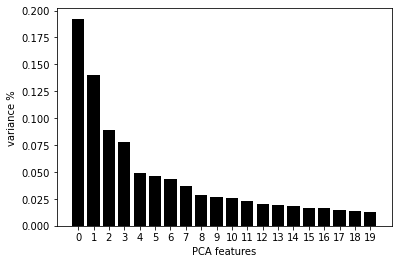

In [64]:
# Plot the explained variances accounted for by each PCA component
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(model_output)

Text(0, 0.5, 'PCA 1')

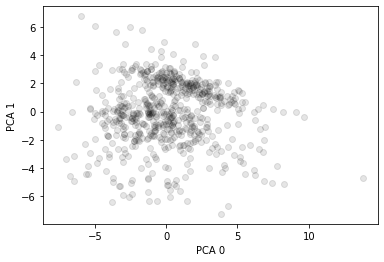

In [65]:
#FOR THE TOP TWO PRINCIPLE COMPONENTS HERE ARE THE CLUSTERS:
plt.scatter(PCA_components[0],PCA_components[1], alpha=0.1, color='black')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
#There are clearly two clusers in these two dimentions - there is potential for K-means to find meaningful clusters

Text(0, 0.5, 'PCA 2')

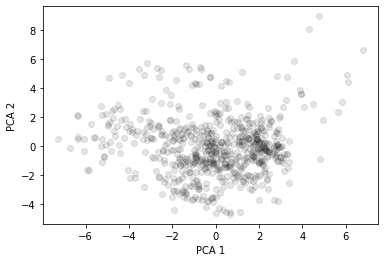

In [66]:
plt.scatter(PCA_components[1],PCA_components[2], alpha=0.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#This is another example of two dimentions of our PCA which helps us visualize potential clusters:

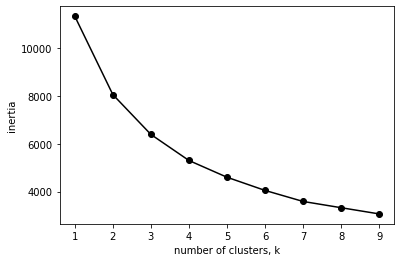

In [67]:
#LETS USE KMEANS TO DISTINGUIUSH THE CLUSTERS
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
#scree plot below indicates the percentage of variance explained, as a function of the number of clusters
#Inertia is the objective function that we want to minimize without overfitting: "Sum of distances of samples to their closest cluster center."

In [68]:
#We chose 4 clusters because of the scree plot above - that is when the intertia starts to level out
kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_components)
print(kmeans.cluster_centers_)

[[-1.55080490e+00 -5.91124833e-01 -9.61894491e-01 -5.56587303e-01
  -6.29509039e-01  3.96104280e-01  1.51335462e-01  1.15890379e-01
  -2.00391817e-01 -4.10521295e-01 -1.90778352e-01  9.04493980e-02
   1.41209117e-01 -4.61213615e-02 -1.48264945e-01 -6.65348891e-02
  -6.71731845e-03  1.49861562e-01  7.55006351e-02  4.16622398e-02]
 [ 1.23254095e-01  2.31150079e+00  2.01832350e-01  1.37708901e-01
   3.55457843e-01 -5.73444237e-01 -2.69139639e-01 -1.78254942e-01
  -1.77971633e-01  4.19456736e-01 -3.69980341e-02 -1.95292105e-02
  -2.85670035e-03 -6.89421791e-02 -3.89699285e-02  1.79933779e-01
   1.34620658e-02  4.46978917e-02 -4.69755901e-02 -8.61453990e-02]
 [-2.53203575e+00 -4.22182944e+00  1.09043572e+00  9.44943348e-01
   1.31958798e+00 -1.84559230e-01  1.61081703e-01 -1.43340359e-01
   6.37499937e-01  6.72137488e-01  3.00852626e-01 -1.60586781e-01
  -2.38374446e-01  9.15723564e-02  3.26003533e-01 -2.64637741e-02
  -2.28644974e-01 -3.24754292e-01  2.21597020e-01 -1.04858885e-01]
 [ 3.70

In [69]:
print(kmeans.labels_)

[1 1 3 3 3 1 1 1 1 3 1 1 1 1 1 1 0 0 1 1 2 1 1 1 1 3 1 1 3 1 1 3 1 0 0 1 1
 1 3 1 1 1 1 1 3 1 0 1 1 1 3 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 3 1 0 0 1 0 1 3 1 3 3 1 3 3 3 1 1 1 3 1 1 1 0 3 3 1 3 3 1 1 3 1 1 1 3
 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 3 1 3 3 3 1 1
 3 1 3 3 1 3 3 1 1 1 3 3 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1 3 3 3 3 1 1 1 3 1 1
 1 1 1 1 1 3 1 1 2 1 1 1 3 1 3 1 1 1 1 3 1 3 1 1 1 1 1 3 3 1 1 1 3 1 1 1 3
 1 1 1 3 3 1 1 1 3 3 1 1 3 1 1 1 1 1 3 0 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 3 3 3 1 3 1 1 1 1 1 1 3 3 3 0 1 3 1 3 3 1 1 0 0 3 0 0 0 0 0 0 3
 0 3 0 0 0 3 0 2 0 3 0 3 0 0 0 2 2 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 3 0 0 0 3 2 3 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 0 3 2 2 3 3 0 0 2 0 3 0 3
 0 3 0 0 0 0 3 3 0 2 0 0 2 0 0 0 0 0 2 0 3 3 0 2 0 3 3 0 0 2 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 0 2 3 0 0 0 0 0 3 0 2 0 0 0 2 3 0 3 0 0 0 3 0 2 3 2 0
 0 0 0 3 0 2 0 0 0 0 0 3 0 3 2 0 0 3 0 2 3 0 2 0 0 2 0 0 2 0 2 0 2 3 0 0 0
 0 0 0 0 0 3 0 0 0 2 0 2 

Text(0, 0.5, 'PCA 1')

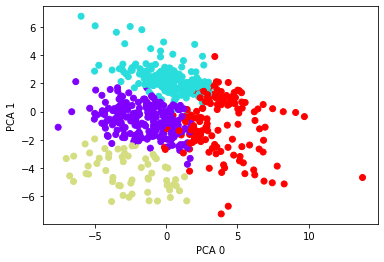

In [70]:
#Colored K-means clusters in the 1st and 2nd PCA component scatter plot
plt.scatter(PCA_components[0],PCA_components[1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')

In [71]:
#APPEND THE KMEANS LABELS TO THE original data frame:
data['Case'] = Case
data['KMeans_Clusters'] = kmeans.labels_

#Append all of the mullen scores
data = pd.merge(data, mullen, on='Case', how='left')
data.drop(data.columns[[1, 2]], axis=1, inplace=True)
#Use sub group meathods to figure out the mullen score averages (and all variable averages) of each group and see if any of them are unique:

In [72]:
data.groupby('KMeans_Clusters').mean()

,VOLUME,Caudate_R,Thalamus_L,Thalamus_R,Caudate,Thalamus,ICV,GM,WM,SCHIZ,BD,MOODD,Psychosis,MVM,GESTNO,EXCL_REASON,FinalDiagnosis_compiled,ZYGOSITY,METHOD,SEX,DGESTAGE,GestAgeBirth,BW,PREMATURE_37,PREMATURE_33,PREMATURE_32,apgar5,MAgeAtBirth,MAGE_enroll,MRACE,MHISPAN,PETHNIC_enroll,PHISPAN_enroll,MS1N_enroll,MEDUY,Child_Language,M_Language_1,M1_Validity,M_Language_2,M2_Validity,MRI_ABS_TIME,sMRI_Scanner,AgeAtMRI,normalized_eacsf_volumes,normalized_Amygdala_L,normalized_Amygdala_R,normalized_Amygdala,normalized_Hippocampus_L,normalized_Hippocampus_R,normalized_Hippocampus,normalized_Caudate_L,normalized_Caudate_R,normalized_Caudate,normalized_Thalamus_L,normalized_Thalamus_R,normalized_Thalamus,normalized_Left_Vent,normalized_Right_Vent,normalized_Total_Vent,normalized_GM,normalized_WM,WGESTAGE,FM_ts_1,RL_ts_1,EL_ts_1,MCOMP_1,GM_ts_2,VR_ts_2,FM_ts_2,RL_ts_2,EL_ts_2,MCOMP_2,Volume_yr1,Volume_yr2
KMeans_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31576.426842,1847.093117,4380.678259,4331.530445,3687.069960,8712.208704,451205.716494,227079.813900,165220.155344,0.000000,0.000000,0.000000,0.000000,0.000000,1.975709,1.813765,-0.817814,0.615385,0.724696,0.558704,2.417004,253.765182,2484.024291,0.611336,0.016194,0.000000,8.688259,30.846154,30.647773,2.518219,0.113360,2.396761,0.170040,1.534413,15.151822,1.773279,-0.222672,0.376518,-0.315789,0.178138,2224.242915,0.246964,30.526316,0.069537,0.000556,0.000548,0.001104,0.002482,0.002407,0.004889,0.004093,0.004108,0.008201,0.009734,0.009626,0.019359,0.004947,0.004393,0.009340,0.503412,0.366482,35.906883,61.323529,50.000000,57.870588,114.664706,53.560284,49.190141,50.443662,51.098592,49.859155,100.478873,78989.213333,80556.573034
1,31887.041327,1902.189745,4517.221582,4491.785918,3797.031327,9009.007500,467000.372146,238380.038158,169984.032375,0.076531,0.056122,0.066327,0.127551,0.051020,1.000000,2.642857,3.025510,-1.000000,0.295918,0.454082,2.586735,274.729592,3299.826531,0.045918,0.000000,0.000000,8.882653,29.198980,28.969388,2.428571,0.066327,2.357143,0.071429,1.668367,15.163265,1.775510,-0.132653,0.668367,-0.250000,0.443878,2072.316327,0.168367,19.943878,0.067972,0.000556,0.000550,0.001106,0.002453,0.002368,0.004821,0.004067,0.004082,0.008149,0.009704,0.009649,0.019353,0.004709,0.004336,0.009045,0.510603,0.364222,38.877551,62.901840,51.208589,58.846626,116.521472,54.460993,51.992908,54.432624,56.900709,55.609929,109.375887,78208.037500,82812.688889
2,40024.623333,1861.239500,4360.772333,4352.963333,3670.996833,8713.735667,477872.775099,238499.703483,171259.417859,0.016667,0.000000,0.016667,0.016667,0.000000,1.950000,6.216667,-0.666667,0.666667,0.900000,0.550000,2.583333,219.000000,1593.550000,1.000000,0.983333,0.550000,7.766667,28.650000,28.666667,2.300000,0.233333,2.183333,0.150000,2.150000,13.583333,1.866667,-0.033333,0.566667,-0.233333,0.233333,2114.866667,0.133333,68.066667,0.083065,0.000542,0.000524,0.001065,0.002303,0.002205,0.004507,0.003808,0.003915,0.007723,0.009167,0.009150,0.018317,0.005948,0.005314,0.011263,0.499384,0.358906,30.916667,59.191489,49.893617,55.659574,111.574468,53.000000,51.388889,50.388889,53.305556,48.750000,102.500000,88507.666667,85287.280000
3,41220.507190,2265.677516,5302.401961,5256.740980,4530.490980,10559.142941,558108.340272,281945.726773,201357.175107,0.039216,0.045752,0.026144,0.058824,0.065359,1.529412,3.437908,1.111111,-0.071895,0.509804,0.627451,2.418301,264.483660,3050.679739,0.300654,0.032680,0.013072,8.640523,28.581699,28.437908,2.633987,0.130719,2.464052,0.150327,1.803922,14.620915,1.869281,-0.111111,0.555556,-0.287582,0.209150,2096.816993,0.091503,44.039216,0.073519,0.000521,0.000512,0.001033,0.002317,0.002265,0.004582,0.004070,0.004071,0.008141,0.009537,0.009456,0.018992,0.005421,0.005017,0.010438,0.505438,0.361129,37.437908,61.336134,49.789916,57.521008,114.000000,54.692308,52.802198,54.164835,55.670330,54.582418,108.736264,87423.090909,91572.461538


Codebook for variables:
 *Case - ID of subject
 *VOLUME - EACSF Volume measured at infancy
 * Quality_Rating - quality rating of EACSF volume segmentation (all included cases passed the qc stage)
 *Hippocampus_L - left hemisphere of hippocampus volume
 *Hippocampus_R - right hemisphere of hippocampus volume
 *Amygdala_L - left hemisphere of amygdala volume
 *Amygdala_R - right hemisphere of amygdala volume
 *Caudate_L - left hemisphere of caudate volume
 *Caudate_R - right hemisphere of caudate volume
 *Thalamus_L - left hemisphere of thalamus volume
 *Thalamus_R - right hemisphere of thalamus volume
 *Hippocampus - volume
 *Amygdala - volume
 *Caudate - volume
 *Thalamus - volume
 *ICV - intracranial cavity volume
 *GM - grey matter volume
 *WM - white matter volume
 *Left_Vent - left ventricle volume
 *Right_Vent - right venticle volume
 *Total_Vent - left and right ventricle volume combined
 *FinalDiagnosis - non-numerical category of all mother's psycological disorders
 *SCHIZ - mother has schizophrenia
 *BD - mother has bipolar disorder
 *MOODD - mother has mood disorder
 *Psychosis - mother has some form of psychosis
 *MVM - Medullary Venous Malformation 
 *normalized_eacsf_volume - nomalized with ICV
 *normalized_Amygdala_L - nomalized with ICV
 *normalized_Amygdala_R - nomalized with ICV
 *normalized_Amygdala - nomalized with ICV
 *normalized_Hippocampus_L - nomalized with ICV
 *normalized_Hippocampus_R - nomalized with ICV
 *normalized_Hippocampus - nomalized with ICV
 *normalized_Caudate_L - nomalized with ICV
 *normalized_Caudate_R - nomalized with ICV
 *normalized_Caudate - nomalized with ICV
 *normalized_Thalamus_L - nomalized with ICV
 *normalized_Thalamus_R - nomalized with ICV
 *normalized_Thalamus - nomalized with ICV
 *normalized_Left_Vent - nomalized with ICV
 *normalized_Right_Vent - nomalized with ICV
 *normalized_Total_Vent - nomalized with ICV
 *normalized_GM - nomalized with ICV
 *normalized_WM - nomalized with ICV
 *GESTNO - Gestation number (1=single gestation, 2=multiple gestations)
 *ZYGOSITY - dizigotic, monozygotic, opposite sex twins
 *GENDER
 *SEX
 *WGESTAGE - weeks gestation
 *DGESTAGE - days gestation
 *GestAgeBirth - days spend in womb during gestation
 *BW - birth weight
 *PREMATURE_37 - premature at 37 weeks
 *PREMATURE_33 - premature at 33 weeks
 *PREMATURE_32 - premature at 32 weeks
 *apgar5 - score to quickly summarize health of new born (not very consistant)
 *MAgeAtBirth - mother age at birth
 *PAgeAtBirth - father age at birth
 *MAGE_enroll - mother age when enrolled in study
 *MRACE - mother race
 *MHISPAN - mother hispanic (y or n)
 *PAGE_enroll - father age when enrolled in study
 *PETHNIC_enroll - father's ethnicity
 *PHISPAN_enroll - father hispanic (y or n)
 *MEDUY - mother education in years
 *FEDUY_enroll - father education in years
 *TINN_enroll - total household income
 *Child_Language 
 *M_Language_1 - mother language at year 1 for child
 *AgeAtMUL_1 - child's age at mullen test at 1 year
 *GM_ts_1 - gross motor score 1 year
 *VR_ts_1 - visual response score 1 year
 *FM_ts_1 - fine mother score 1 year
 *RL_ts_1 - responsive language score 1 year
 *EL_ts_1 - expressive lnaguage score 1 year
 *MCOMP_1 - mullen composite score 1 year
 *M_Language_2 - mother language at year 2 for child
 *AgeAtMUL_2 - child's age at mullen test at year 1
 *GM_ts_2 - gross motor score year 2
 *VR_ts_2 - visual response score year 2
 *FM_ts_2 - fine motor score year 2
 *RL_ts_2 - receptive language score year 2
 *EL_ts_2 - expresive language score year 2
 *MCOMP_2 - mullen composite score year 2
 *Volume_yr1 - EACSF volume year 1
 *Volume_yr2 - EACSF volume year 2
 *normalized_eacsf_volumes_1 - normalized with ICV
 *normalized_eacsf_volumes_2 - normalized with ICV
 *MRI_ABS_TIME - absolute time during MRI at infancy
 *sMRI_Scanner - type of MRI scanner
 *AgeAtMRI - child's age at first MRI

Please see our written report for analysis of our k-means results, as well as suggested routes of study for the future.